> # 로지스틱 회귀

___
> ## 손실함수의 차이

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_boundary(w):
  x = np.arange(-1.0, 1.1, 0.1)
  y = eval('%f*x + %f' % ((-w[1] / (w[2]+1e-6)), (-w[0]/(w[2]+1e-6))))
  plt.plot(x, y, linewidth = 2)
  
  
# scatter plot 함수 (개인 버전)
def plot_scatter():
  sns.lmplot('x0', 'x1', hue = 'y', data = dataset, fit_reg= False)
  plt.ylim(-1, 1)
  plt.xlim(-1,1)

- 퍼셉트론에서의 손실합수는 합리적이지만 식별 경계를 100% 구분하는 순간 손실이 0이 되어 학습을 멈춤
- 하지만 다음 예에서 볼 수 있듯이, 퍼셉트론의 손실함수로 찾아낸 판별식은 매우 효율적인 판별식이 아닐 수도 있음

In [3]:
X_dataset, y_dataset = make_blobs(centers=[[-0.3, 0.5], [0.3, -0.2]],
                                  cluster_std=0.2,
                                  n_samples=100,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset
dataset['y'] = dataset.y.apply(lambda x: 1 if x == 1 else -1)

In [4]:
def train(dataset, epochs=1):
    learning_rate = 1.0
    w = np.array([0.0, 0.0, 1.0])  # 초깃값
    for epoch in range(epochs):
        for i, (x0, x1, y) in dataset.iterrows():
            x = np.array([1.0, x0, x1])
            if y * np.dot(w, x) > 0:
                pass  # 괜찮다면 아무 처리도 하지 않기
            else:
                w += learning_rate * y * x

    return w

[ 0.          1.48665224 -0.98906527]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


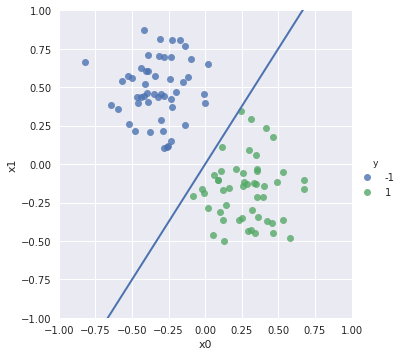

In [5]:
w = train(dataset=dataset,
          epochs=20)
print(w)
plot_scatter()
plot_boundary(w)

- 위의 판별식의 경우 오분류가 0으로 퍼셉트론의 손실함수도 0이 됨 (손실함수가 0이되는 순간 학습이 멈춤)
- 하지만 판별식은 `y = 1`에 치우처져 있음을 볼 수 있고, 이는 최선의 판별식이라고 하기는 어려움
- 그림으로 보면 아래와 같은 형태를 띄게 됨:

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


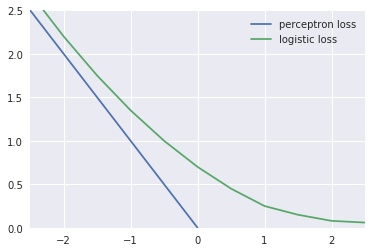

In [6]:
x_logic = np.linspace(-2.5,2.5, 11)
#y_logic = np.log(1-np.exp(-np.dot(w, x)))
y_logic = [2.7, 2.2,1.75, 1.35, 1, 0.7, 0.45, 0.25, 0.15, 0.08, 0.06]
x_perceptron = [-2.5, 0]
y_perceptron = [2.5, 0]

plt.plot(x_perceptron, y_perceptron, label = 'perceptron loss')
plt.plot(x_logic, y_logic, label = 'logistic loss')
plt.xlim(-2.5,2.5)
plt.ylim(0,2.5)
plt.legend()

___
> ## 확률과 시그모이드 함수

- 로지스틱 회귀를 위해 레이블을 다시 (0,1)로 변경
- 과거에는 판별식에 따라 결과 값을 추정하였지만, 이번에는 시그모이드 함수를 통해 특정 레이블에 속할 확률을 추정
- 그래프에서 보았을 때 판별식에 가까운 점은 특정 레이블에 속할 확률이 낮을 것이고, 멀리 있는 점은 특정 레이블에 속할 확률이 높을 것

In [7]:
X_dataset, y_dataset = make_blobs(centers=[[-0.3, 0.5], [0.3, -0.2]],
                                  cluster_std=0.2,
                                  n_samples=100,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,-0.6,'more likely to be y=1')

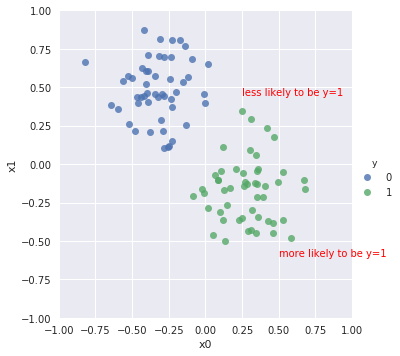

In [8]:
plot_scatter()
#plt.Circle((0.25, 0.35), 0.1, fill=False, linestyle='dashed', linewidth=2)
plt.text(0.25,0.45, 'less likely to be y=1', color = 'red')
plt.text(0.5, -0.6, 'more likely to be y=1', color = 'red')

- 시그모이드 함수는 다음 수식으로 표현 가능:  
    $ y = \frac{1}{1+e^{-x}}$
- 함수로 구현한다면 다음과 같이 구현 가능:

In [9]:
def sigmoid(d):
  return 1 / (1 + np.exp(-d))

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


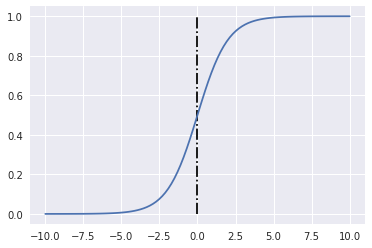

In [10]:
x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x, y)
plt.vlines(x = 0, ymin = 0, ymax = 1, linestyle ='-.')

- sigmoid 함수에 들어 갈 x 값은 판별식과 각 점과의 거리가 될 것
- 이는 앞전에 설명한 것 처럼 내적값 `np.dot(w,x)`이 될 것:  
    파란점에 가까울수록 음수 값이 커지며 $p(y=1) \approx 0$,  
    녹색점에 가까울수록 양수 값이 커지며 $p(y=1) \approx 1$,  
    판별식 위에 점이 있다면 $p(y=1) = 1$이 될 것
- 각 점의 확률을 곱하면 전체 확률을 구할 수 있을 것이나, 부동소수 연산 대신 로그함수를 활용하여 계산하여 언더플로우 방지
- 손실함수는 `np.log(1-np.exp(-np.dot(w,x)))`로 나타낼 수 있음

___
> ## 손실 함수의 기울기

- 로지스틱의 손실함수는 가중치 w에 대해 식별경계가 얼마나 잘못되었는지를 수치화한 값
- 따라서 0이 될수 없는 만큼 손실함수가 최솟값이 되는 부분을 찾아야함
- 이는 미분을 사용하여 구하는 것이 최적

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


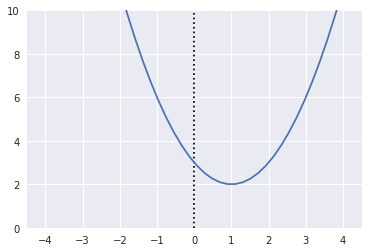

In [15]:
x = np.linspace(-2,4,30)
y = (x-1)**2 + 2
plt.plot(x,y)
plt.xlim(-4.5, 4.5)
plt.ylim(0, 10)
plt.vlines(x=0,  ymin=0, ymax=10, linestyles= ':')

- 위 그래프에서 기울기가 음수일 경우 x를 플러스 하면 최소값에 근사, 반대로 기울기가 양수일 떄는 x를 마이너스 해서 최소값에 근사할 수 있음
- 이를 코드로 표현하면 아래와 같이 나타낼 수 있음:

In [ ]:
gradient = 2*x -2
x = x - learning_rate *gradient

- 최소값을 찾는 과정을 코드로 구현하면 다음과 같은 예제를 확인할 수 있음:

In [40]:
x = 3.0 # 초깃값
lr = 0.2
steps_x = [x]
fx = '(x-1)**2 + 2'
steps_y = [eval(fx)]

for step in range(10):
  gradient = 2*x -2
  x = x - lr * gradient
  
  steps_x.append(x)
  steps_y.append(eval(fx))

Text(0.5,1,'Gradient Descent at learning_rate = 0.2\n')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


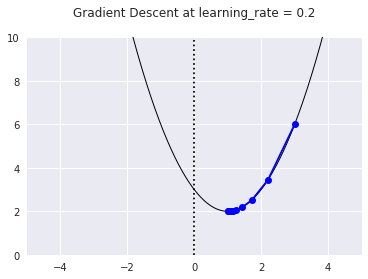

In [43]:
loss_x = np.array(np.arange(-10, 10, 0.01))
loss_y = eval('(loss_x-1)**2+2')

plt.xlim(-5,5)
plt.ylim(0,10)
plt.plot(loss_x, loss_y, color = 'k', linewidth=1)
plt.plot(steps_x, steps_y, '-bo')
plt.vlines(x=0, ymin=0, ymax=10, linestyle= ':')
plt.title('Gradient Descent at learning_rate = 0.2\n')

Text(0.5,1,'Gradient Descent at learning_rate = 1.05\n')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


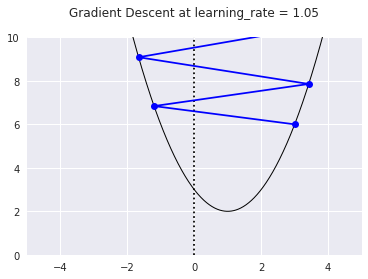

In [45]:
x = 3.0 # 초깃값
lr = 1.05
steps_x = [x]
fx = '(x-1)**2 + 2'
steps_y = [eval(fx)]

for step in range(10):
  gradient = 2*x -2
  x = x - lr * gradient
  
  steps_x.append(x)
  steps_y.append(eval(fx))
  
  loss_x = np.array(np.arange(-10, 10, 0.01))
loss_y = eval('(loss_x-1)**2+2')

plt.xlim(-5,5)
plt.ylim(0,10)
plt.plot(loss_x, loss_y, color = 'k', linewidth=1)
plt.plot(steps_x, steps_y, '-bo')
plt.vlines(x=0, ymin=0, ymax=10, linestyle= ':')
plt.title('Gradient Descent at learning_rate = 1.05\n')

- learning_rate에 따라 학습속도가 다름
- learning_rate가 높을 경우 학습속도가 빨라지지만, 반대로 너무 크게 발산하는 경향을 보일 수도 있음
- 위와 같은 과정을 **Gradient Descent(경사하강법)**이라고 지칭함

- 로지스틱 회귀의 손실함수는 `np.log(1-np.exp(-np.dot(w,x)))`으로 구현하였음
- 이 경우 기울기는 `np.dot(x.T, sigmoid(np.dot(x,w)))`로 나타낼 수 있음
- 전체 학습 코드는 다음과 같음:

In [56]:
def sigmoid(score):
  return 1/ (1+np.exp(-score))
  
def train(dataset, epochs= 1, lr = 1.0):
  lr = lr
  w = np.array([0.0, 0.0, 1.0])
  for epoch in range(epochs):
    for i, (x0, x1, y) in dataset.iterrows():
      x = np.array([1.0, x0, x1])
      gradient = np.dot(x.T, y-sigmoid(np.dot(x, w)))
      
      w += lr *gradient
  return w

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,1,'logistic classification using Gradient Descent at lr= 1, epochs =1\n')

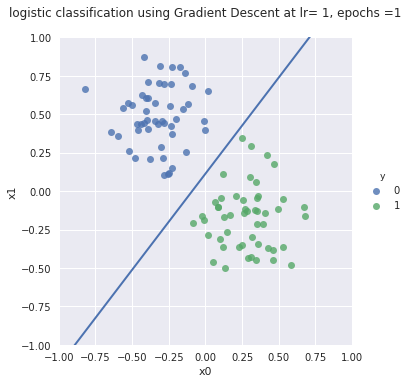

In [62]:
w = train(dataset = dataset, epochs = 1)
plot_scatter()
plot_boundary(w=w)
plt.title('logistic classification using Gradient Descent at lr= 1, epochs =1\n')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,1,'logistic classification using Gradient Descent at lr= 1, epochs =10\n')

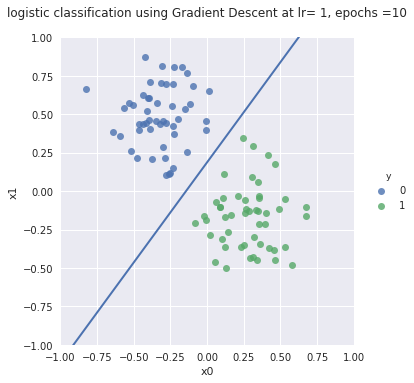

In [63]:
w = train(dataset = dataset, epochs = 10)
plot_scatter()
plot_boundary(w=w)
plt.title('logistic classification using Gradient Descent at lr= 1, epochs =10\n')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,1,'logistic classification using Gradient Descent at lr= 1, epochs =200\n')

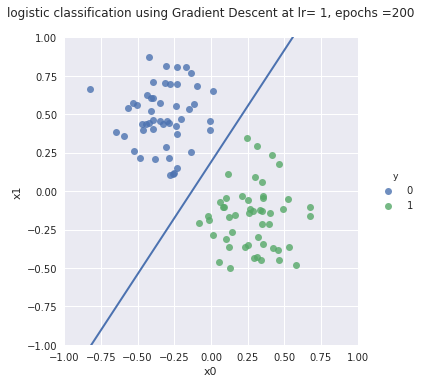

In [64]:
w = train(dataset = dataset, epochs = 200)
plot_scatter()
plot_boundary(w=w)
plt.title('logistic classification using Gradient Descent at lr= 1, epochs =200\n')